# ResNet50によるImageNet画像分類と精度評価

主な流れ：
- 必要なライブラリのインストール
- データセットの前処理とDataLoaderの作成
- ResNet50モデルの準備
- 学習と精度評価

In [1]:
# 必要なライブラリのインポート
import torch
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

In [2]:
# データセットの前処理とDataLoaderの作成
data_dir = './imagenet-256'


In [5]:
# データ拡張を施したtransform
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(root=data_dir, transform=transform)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)



# ResNet50モデルの準備
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet50(pretrained=True)
num_classes = len(train_dataset.dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# 損失関数と最適化手法の設定
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

from tqdm.notebook import tqdm

num_epochs = 20
best_acc = 0.0
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_iter = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]', leave=False)
    for images, labels in train_iter:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        train_iter.set_postfix({'loss': loss.item()})
    epoch_loss = running_loss / len(train_loader.dataset)

    # 検証
    model.eval()
    correct = 0
    total = 0
    val_iter = tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Val]', leave=False)
    with torch.no_grad():
        for images, labels in val_iter:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    epoch_acc = 100 * correct / total
    print(f'Epoch {epoch+1}/{num_epochs} | Loss: {epoch_loss:.4f} | Val Acc: {epoch_acc:.2f}%')

    # 最良モデル保存
    if epoch_acc > best_acc:
        best_acc = epoch_acc
        torch.save(model.state_dict(), 'best_resnet50.pth')
        print(f'Best model saved (Val Acc: {best_acc:.2f}%)')

/home/gotou/miniconda3/envs/env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/gotou/miniconda3/envs/env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 1/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 1/20 | Loss: 5.1612 | Val Acc: 17.16%
Best model saved (Val Acc: 17.16%)
Best model saved (Val Acc: 17.16%)


Epoch 2/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 2/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 2/20 | Loss: 3.6009 | Val Acc: 31.48%
Best model saved (Val Acc: 31.48%)
Best model saved (Val Acc: 31.48%)


Epoch 3/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 3/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 3/20 | Loss: 3.0089 | Val Acc: 37.20%
Best model saved (Val Acc: 37.20%)
Best model saved (Val Acc: 37.20%)


Epoch 4/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 4/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 4/20 | Loss: 2.6730 | Val Acc: 42.06%
Best model saved (Val Acc: 42.06%)
Best model saved (Val Acc: 42.06%)


Epoch 5/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 5/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 5/20 | Loss: 2.4402 | Val Acc: 45.48%
Best model saved (Val Acc: 45.48%)
Best model saved (Val Acc: 45.48%)


Epoch 6/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 6/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 6/20 | Loss: 2.2711 | Val Acc: 47.56%
Best model saved (Val Acc: 47.56%)
Best model saved (Val Acc: 47.56%)


Epoch 7/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 7/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 7/20 | Loss: 2.1303 | Val Acc: 48.71%
Best model saved (Val Acc: 48.71%)
Best model saved (Val Acc: 48.71%)


Epoch 8/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 8/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 8/20 | Loss: 2.0160 | Val Acc: 51.44%
Best model saved (Val Acc: 51.44%)
Best model saved (Val Acc: 51.44%)


Epoch 9/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 9/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 9/20 | Loss: 1.9227 | Val Acc: 52.28%
Best model saved (Val Acc: 52.28%)
Best model saved (Val Acc: 52.28%)


Epoch 10/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 10/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 10/20 | Loss: 1.8412 | Val Acc: 52.53%
Best model saved (Val Acc: 52.53%)
Best model saved (Val Acc: 52.53%)


Epoch 11/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 11/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 11/20 | Loss: 1.7595 | Val Acc: 52.86%
Best model saved (Val Acc: 52.86%)
Best model saved (Val Acc: 52.86%)


Epoch 12/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 12/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 12/20 | Loss: 1.7004 | Val Acc: 55.03%
Best model saved (Val Acc: 55.03%)
Best model saved (Val Acc: 55.03%)


Epoch 13/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 13/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 13/20 | Loss: 1.6426 | Val Acc: 55.57%
Best model saved (Val Acc: 55.57%)
Best model saved (Val Acc: 55.57%)


Epoch 14/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 14/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 14/20 | Loss: 1.5899 | Val Acc: 55.97%
Best model saved (Val Acc: 55.97%)
Best model saved (Val Acc: 55.97%)


Epoch 15/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 15/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 15/20 | Loss: 1.5423 | Val Acc: 56.57%
Best model saved (Val Acc: 56.57%)
Best model saved (Val Acc: 56.57%)


Epoch 16/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 16/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 16/20 | Loss: 1.4995 | Val Acc: 56.88%
Best model saved (Val Acc: 56.88%)
Best model saved (Val Acc: 56.88%)


Epoch 17/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 17/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 17/20 | Loss: 1.4551 | Val Acc: 57.01%
Best model saved (Val Acc: 57.01%)
Best model saved (Val Acc: 57.01%)


Epoch 18/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 18/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 18/20 | Loss: 1.4144 | Val Acc: 57.74%
Best model saved (Val Acc: 57.74%)
Best model saved (Val Acc: 57.74%)


Epoch 19/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 19/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 19/20 | Loss: 1.3782 | Val Acc: 57.93%
Best model saved (Val Acc: 57.93%)
Best model saved (Val Acc: 57.93%)


Epoch 20/20 [Train]:   0%|          | 0/6748 [00:00<?, ?it/s]

Epoch 20/20 [Val]:   0%|          | 0/1687 [00:00<?, ?it/s]

Epoch 20/20 | Loss: 1.3485 | Val Acc: 58.33%
Best model saved (Val Acc: 58.33%)
Best model saved (Val Acc: 58.33%)


training_log.csv に保存しました！


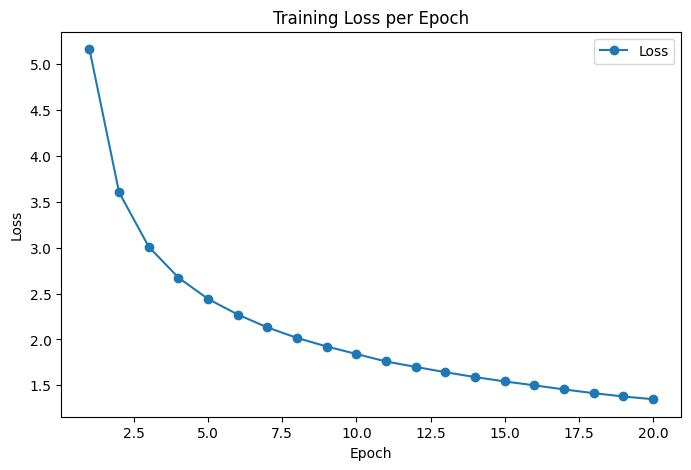

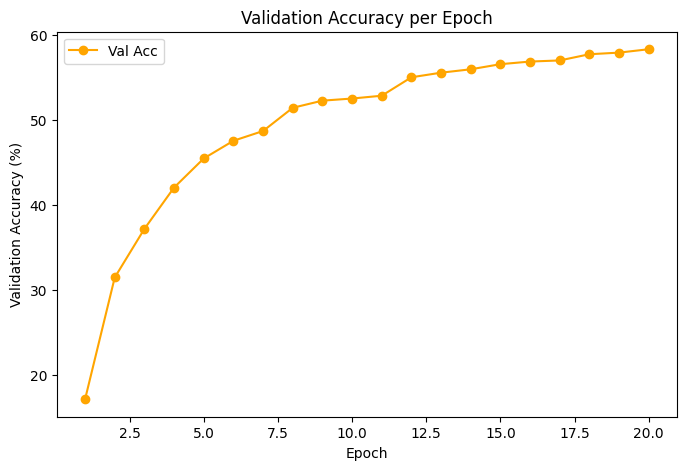

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# データ
epochs = list(range(1, 21))
losses = [
    5.1612, 3.6009, 3.0089, 2.6730, 2.4402,
    2.2711, 2.1303, 2.0160, 1.9227, 1.8412,
    1.7595, 1.7004, 1.6426, 1.5899, 1.5423,
    1.4995, 1.4551, 1.4144, 1.3782, 1.3485
]
val_accs = [
    17.16, 31.48, 37.20, 42.06, 45.48,
    47.56, 48.71, 51.44, 52.28, 52.53,
    52.86, 55.03, 55.57, 55.97, 56.57,
    56.88, 57.01, 57.74, 57.93, 58.33
]

# DataFrameにまとめる
df = pd.DataFrame({
    "Epoch": epochs,
    "Loss": losses,
    "Val_Acc": val_accs
})

# CSVに保存
df.to_csv("training_log.csv", index=False)

print("training_log.csv に保存しました！")


# エポックごとのLoss
plt.figure(figsize=(8,5))
plt.plot(epochs, losses, marker='o', label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.legend()
plt.show()

# エポックごとのValidation Accuracy
plt.figure(figsize=(8,5))
plt.plot(epochs, val_accs, marker='o', color="orange", label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy (%)")
plt.title("Validation Accuracy per Epoch")
plt.legend()
plt.show()
